# Exploring Decision Trees in Data Science

I am delighted to welcome you to this exciting exploration of Decision Trees in the field of Data Science. My name is Shubham Pathak, and I am enthusiastic about leading this journey into the realm of data analytics, machine learning, and natural language processing.

With a recent degree in Information Technology, specializing in data analytics, I am committed to fostering a thriving data science community within our college. This notebook will serve as a guide to understanding the intricacies of decision trees, a crucial concept in machine learning.

## What to Expect

In this notebook, we will delve into the world of decision trees and understand how they can be applied to solve various classification and regression tasks. We'll also explore techniques like pruning and feature importance, and discuss when decision trees are a suitable choice for a given problem.

## Your Input Matters

Your questions, concerns, and aspirations are not only welcomed but encouraged. Together, we will build a strong foundation in decision tree algorithms, empowering us to excel in the field of data science.

## Let's Connect

I am looking forward to our collaborative journey and to witnessing the growth and success that will undoubtedly emerge from this endeavor. Feel free to connect with me on [LinkedIn](https://www.linkedin.com/in/ryd1e/), where we can continue the discussion and share insights.

Warm regards,

Shubham Pathak  
Mentor, Data Science Community, TSS


**Decision Trees (DT) Overview:**

1. **Basic Idea**:

   - Decision Trees are a versatile class of supervised learning algorithms used for both classification and regression tasks.
   - They work by recursively partitioning the input space into regions, making decisions based on the feature values.

2. **How it Works**:

   - **Step 1**: Starting from the root node, the algorithm selects a feature that best splits the data into distinct classes or groups.
   - **Step 2**: It continues this process for each subset, creating a tree structure where each internal node represents a decision based on a feature, and each leaf node represents a class or a value.
   - **Step 3**: The process continues until a stopping criterion is met, such as a maximum depth of the tree or a minimum number of samples in a leaf node.

3. **Parameters**:

   - **Criterion for Splitting**: Defines the measure used to evaluate the quality of a split (e.g., Gini impurity, entropy for classification; mean squared error for regression).
   - **Maximum Depth**: Limits the depth of the tree.
   - **Minimum Samples per Leaf**: Specifies the minimum number of samples required to be at a leaf node.

4. **Types of Trees**:

   - **Classification Trees**: Used for categorical target variables, with leaves representing class labels.
   - **Regression Trees**: Used for continuous target variables, with leaves representing numerical values.

5. **Advantages**:

   - Easy to understand and interpret. Trees can be visualized.
   - Can handle both categorical and numerical data.
   - Non-parametric, so they can capture complex relationships.
   - Robust to outliers.

6. **Disadvantages**:

   - Prone to overfitting, especially if the tree grows very deep.
   - Can be sensitive to small perturbations in the data.
   - Can create complex trees that are hard to interpret.

7. **Use Cases**:

   - **Customer Segmentation**: Identifying groups of customers based on purchasing behavior.
   - **Credit Scoring**: Assessing creditworthiness based on features like income, age, and credit history.
   - **Medical Diagnosis**: Helping doctors make decisions based on patient symptoms.
   - **Predictive Maintenance**: Predicting when a machine is likely to fail based on sensor data.

8. **Tips for Using Decision Trees**:

   - **Prune Trees**: Use techniques like post-pruning or setting a maximum depth to prevent overfitting.
   - **Feature Importance**: Analyze feature importance to understand which variables are most influential.
   - **Ensemble Methods**: Combine multiple trees using techniques like Random Forests or Gradient Boosting to improve performance.

9. **Possible Improvements**:

   - **Ensemble Methods**: Combining multiple decision trees (Random Forests, Gradient Boosting) often leads to better performance than using a single tree.
   - **Feature Engineering**: Creating new features or transforming existing ones can enhance tree performance.

10. **Extensions**:

    - **Random Forest**: An ensemble method that builds multiple decision trees and combines their outputs.
    - **Gradient Boosting**: Another ensemble technique that builds trees sequentially, with each tree trying to correct the errors of the previous ones.

11. **When to Choose Decision Trees**:

   - **Interpretability is Important**: When it's crucial to understand and explain how the model makes predictions.
   - **Feature Importance is Desired**: When you want to know which features are most influential in the decision-making process.
   - **Dealing with Categorical Data**: Decision trees handle categorical variables naturally.

12. **When NOT to Choose Decision Trees**:

   - **Sensitive to Noise**: If the data contains a lot of noise, decision trees can overfit.
   - **When High Predictive Accuracy is Critical**: Other models like Random Forests or Gradient Boosting may outperform a single decision tree in terms of accuracy.

### More about ensemble methods:

There are several types of ensemble methods, including:

1. **Bagging (Bootstrap Aggregating):** This involves training multiple instances of the same learning algorithm on different subsets of the training data. In the case of decision trees, this might involve training multiple trees on random subsets of the data and then aggregating their predictions.

2. **Boosting:** Boosting also builds multiple models sequentially, but it does so in a way that each model corrects the errors of the previous one. Popular boosting algorithms include AdaBoost and Gradient Boosting.

3. **Random Forest:** This is an ensemble learning method that constructs a multitude of decision trees at training time and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

4. **Stacking:** Stacking involves training multiple different models and then using another model (often called a meta-model) to combine their predictions.



## Lets start with the code.......

C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_6068\2092134363.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].median(), inplace=True)


Accuracy: 0.7486033519553073


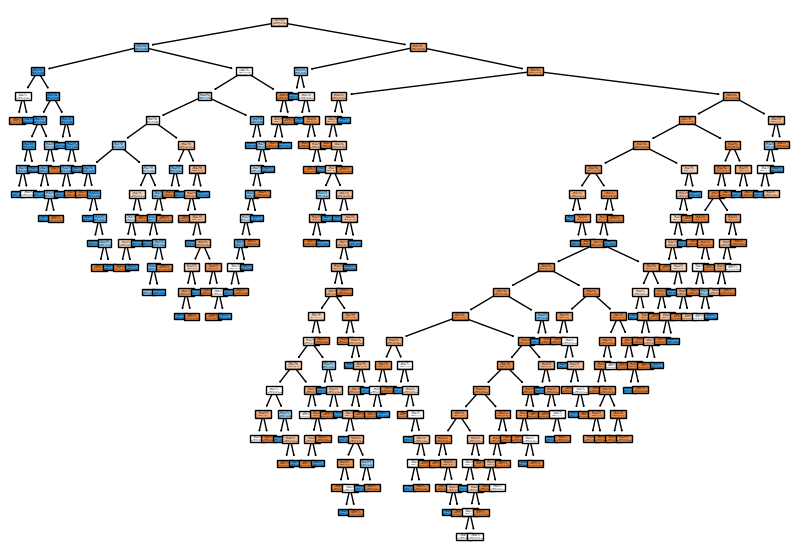

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Titanic dataset (you can download it from various sources, e.g., Kaggle)
# For this example, I'll use a simplified version from seaborn
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Prepare the data (You may need to preprocess this dataset further depending on your specific use case)
X = titanic[['pclass', 'sex', 'age', 'fare']]  # Features
y = titanic['survived']  # Target variable

# Handle missing values (you may need to customize this based on your dataset)
X['age'].fillna(X['age'].median(), inplace=True)

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['sex'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the decision tree
plt.figure(figsize=(10, 7))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()


Accuracy (Pruned Tree): 0.7318435754189944


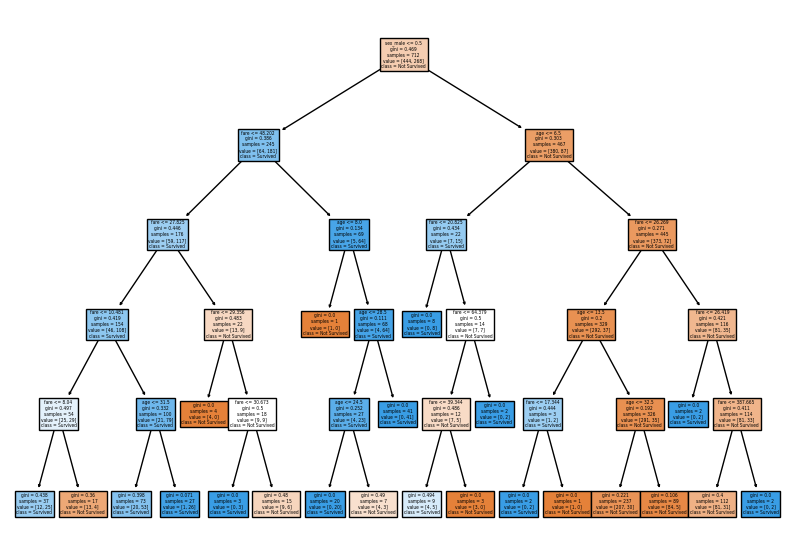

In [23]:
# Initialize the Decision Tree Classifier with max_depth
clf_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the pruned classifier on the training data
clf_pruned.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pruned = clf_pruned.predict(X_test)

# Calculate the accuracy for pruned tree
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy (Pruned Tree): {accuracy_pruned}")

# Visualize the pruned decision tree
plt.figure(figsize=(10, 7))
plot_tree(clf_pruned, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

Accuracy (Pruned Tree): 0.7653631284916201


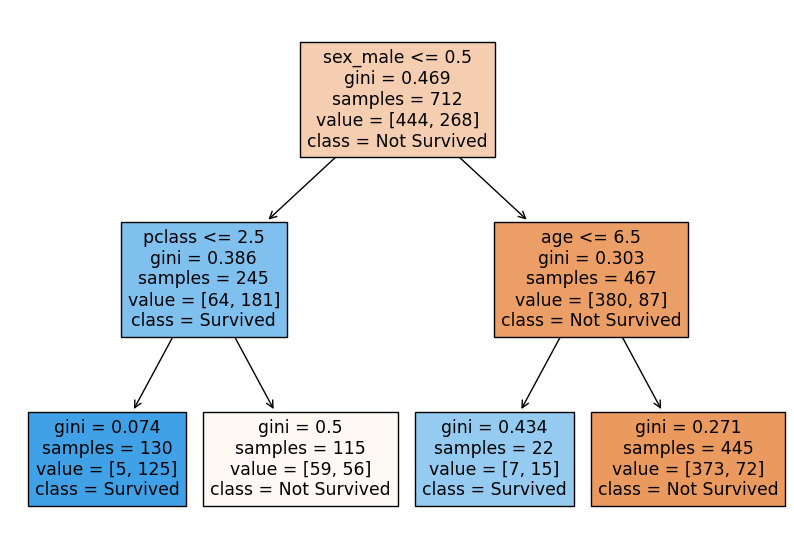

In [20]:
# Initialize the Decision Tree Classifier with max_depth
clf_pruned = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the pruned classifier on the training data
clf_pruned.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pruned = clf_pruned.predict(X_test)

# Calculate the accuracy for pruned tree
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy (Pruned Tree): {accuracy_pruned}")

plt.figure(figsize=(10, 7))
plot_tree(clf_pruned, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], impurity=True)
plt.show()


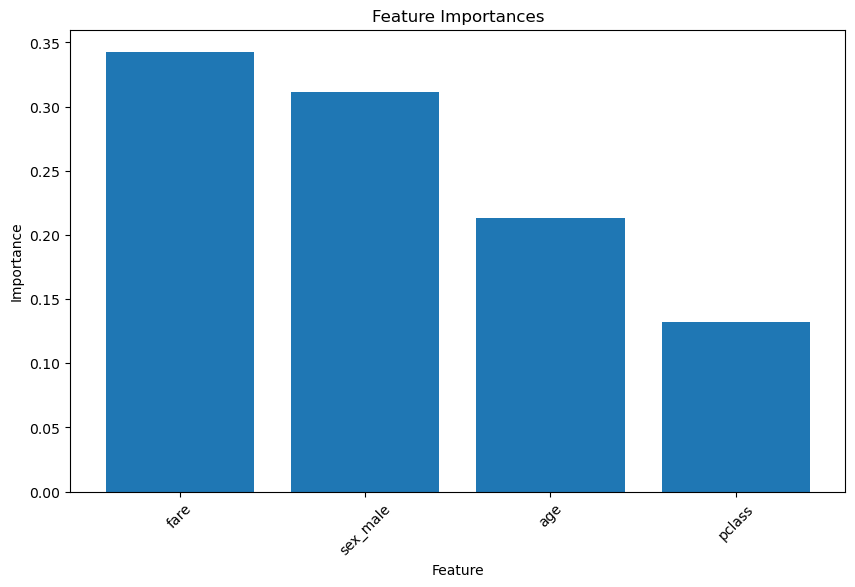

In [21]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature names and their importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.title('Feature Importances')
plt.show()